In [5]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler
import numpy as np
import pandas as pd

## Starch GH data

In [2]:
gh_counts = \
{'Control': 342,
 'Potato': 131,
 'Ipomea': 206}

In [3]:
gh_families_rpkm = \
{'Control': {'AA13': 0.0,
  'GH13': 401.0403,
  'GH133': 3.7344,
  'GH14': 0.0,
  'GH15': 92.7474,
  'GH57': 49.10210000000001,
  'GH97': 3.9755000000000003},
 
 'Potato': {'AA13': 5.8108,
  'GH13': 1306.7631000000001,
  'GH133': 2.8088,
  'GH14': 0.0,
  'GH15': 77.0526,
  'GH57': 38.517399999999995,
  'GH97': 13.340599999999998},
 'Ipomea': {'AA13': 0.0,
  'GH13': 800.8272,
  'GH133': 4.4308,
  'GH14': 4.6074,
  'GH15': 121.4223,
  'GH57': 41.5405,
  'GH97': 8.6548}}

In [4]:
gh_families_cnt = \
{'Control': {'AA13': 0,
  'GH13': 233,
  'GH133': 2,
  'GH14': 0,
  'GH15': 72,
  'GH57': 31,
  'GH97': 4},
 'Potato': {'AA13': 2,
  'GH13': 101,
  'GH133': 1,
  'GH14': 0,
  'GH15': 17,
  'GH57': 3,
  'GH97': 7},
 'Ipomea': {'AA13': 0,
  'GH13': 166,
  'GH133': 1,
  'GH14': 1,
  'GH15': 27,
  'GH57': 7,
  'GH97': 4}}

# Starch amylases plot

## Gene ids taxonomy and identity tracks

In [16]:
fixed_gene_data = pd.read_pickle("gene_id_blastp_data.pkl")
fixed_gene_data

,Name,Pairwise Identity,Accession,Bit-Score,Description,E Value,BlastHitOrganism,Query,BlastHitTaxonomy,GH,...,RPKM,scaffold,KaijuTaxonomy,Domain,Phylum,Class,Order,Family,Genus,Species
index,,,,,,,,,,,,,,,,,,,,,
0,WP_273848370,99.2,WP_273848370,1330.08,"1,4-alpha-glucan branching protein GlgB [Halal...",0.0,Halalkalibacter alkalisediminis,default_ipomea_NODE_1110_length_13415_cov_21.1...,Bacteria; Bacillota; Bacilli; Bacillales; Baci...,GH13,...,9.8555,NODE_1110_length_13415_cov_21.190583,cellular organisms; Bacteria; Terrabacteria gr...,Bacteria,Bacillota,Bacilli,Bacillales,Bacillaceae,Halalkalibacter,Halalkalibacter alkalisediminis
1,WP_017580770,99.1,WP_017580770,1310.43,maltose alpha-D-glucosyltransferase [Nocardiop...,0.0,Nocardiopsis valliformis,default_ipomea_NODE_7096_length_4342_cov_6.804...,Bacteria; Actinomycetota; Actinomycetes; Strep...,GH13,...,4.7142,NODE_7096_length_4342_cov_6.804689,cellular organisms; Bacteria; Terrabacteria gr...,Bacteria,Actinomycetota,Actinomycetes,Streptosporangiales,Nocardiopsaceae,Nocardiopsis,unclassified Nocardiopsis
2,WP_239646189,98.8,WP_239646189,1007.67,glycoside hydrolase family 15 protein [Nocardi...,0.0,Nocardiopsis valliformis,default_ipomea_NODE_14511_length_2705_cov_5.82...,Bacteria; Actinomycetota; Actinomycetes; Strep...,GH15,...,3.7745,NODE_14511_length_2705_cov_5.821157,cellular organisms; Bacteria; Terrabacteria gr...,Bacteria,Actinomycetota,Actinomycetes,Streptosporangiales,Nocardiopsaceae,Nocardiopsis,Nocardiopsis valliformis
3,MDQ4108958,98.2,MDQ4108958,1432.93,glycogen debranching protein GlgX [Actinomycet...,0.0,Actinomycetota bacterium,default_control_NODE_13140_length_4035_cov_5.3...,Bacteria; Actinomycetota,GH13,...,1.4622,NODE_13140_length_4035_cov_5.303689,cellular organisms; Bacteria; Terrabacteria gr...,Bacteria,Chloroflexota,Chloroflexia,Herpetosiphonales,Herpetosiphonaceae,Herpetosiphon,Herpetosiphon geysericola
4,MDQ3948691,98.1,MDQ3948691,1810.81,hypothetical protein [Thermoproteota archaeon],0.0,Thermoproteota archaeon,default_ipomea_NODE_705_length_16709_cov_6.108...,Archaea; Thermoproteota,GH133,...,4.4308,NODE_705_length_16709_cov_6.108045,cellular organisms; Archaea; TACK group; Nitro...,Archaea,TACK group,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,Nitrososphaera,Nitrososphaera viennensis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,WP_301050365,100.0,WP_301050365,2302.32,maltose alpha-D-glucosyltransferase [Pseudomon...,0.0,Pseudomonas sp.,default_control_NODE_93_length_29840_cov_7.559...,Bacteria; Pseudomonadota; Gammaproteobacteria;...,GH13,...,1.6548,NODE_93_length_29840_cov_7.559991,cellular organisms; Bacteria; Pseudomonadota; ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,unclassified Pseudomonas
675,WP_301050360,100.0,WP_301050360,1199.50,malto-oligosyltrehalose trehalohydrolase [Pseu...,0.0,Pseudomonas sp.,default_control_NODE_93_length_29840_cov_7.559...,Bacteria; Pseudomonadota; Gammaproteobacteria;...,GH13,...,1.6548,NODE_93_length_29840_cov_7.559991,cellular organisms; Bacteria; Pseudomonadota; ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,unclassified Pseudomonas
676,WP_003207536,100.0,WP_003207536,1496.87,MULTISPECIES: glycogen debranching protein Glg...,0.0,NaN,default_control_NODE_93_length_29840_cov_7.559...,Bacteria; Pseudomonadota; Gammaproteobacteria;...,GH13,...,1.6548,NODE_93_length_29840_cov_7.559991,cellular organisms; Bacteria; Pseudomonadota; ...,Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,unclassified Pseudomonas


### Selecting taxon level and the abundance cutoff

In [17]:
DISPLAY_CUTOFF = 2 #min percent gene count per metagenome
GROUP = "Order"

In [18]:
new_df_lst = []
for i, x in fixed_gene_data.groupby(by=['Metagenome', 'GH', GROUP]):
    new_df_lst.append(list(i)+[len(x)])
new_df = pd.DataFrame(new_df_lst, columns=['Metagenome', 'GH', GROUP, 'Count'])
new_df

,Metagenome,GH,Order,Count
0,Control,GH13,Acidimicrobiales,7
1,Control,GH13,Acidithiobacillales,2
2,Control,GH13,Actinomycetales,4
3,Control,GH13,Bacillales,2
4,Control,GH13,Balneolales,2
...,...,...,...,...
208,Potato,GH57,Micrococcales,1
209,Potato,GH97,Egicoccales,2
210,Potato,GH97,Maricaulales,1
211,Potato,GH97,Streptosporangiales,1


In [19]:
new_df["Percent"] = new_df.Count * 100 / new_df.Count.sum()
new_df["Percent_per_mg"] = new_df.apply(lambda row: row.Count * 100 / sum(gh_families_cnt[row.Metagenome].values()), axis=1)
new_df["Percent_per_mg_per_gh"] = new_df.apply(lambda row: row.Count * 100 / gh_families_cnt[row.Metagenome][row.GH], axis=1)
new_df

,Metagenome,GH,Order,Count,Percent,Percent_per_mg,Percent_per_mg_per_gh
0,Control,GH13,Acidimicrobiales,7,1.030928,2.046784,3.004292
1,Control,GH13,Acidithiobacillales,2,0.294551,0.584795,0.858369
2,Control,GH13,Actinomycetales,4,0.589102,1.169591,1.716738
3,Control,GH13,Bacillales,2,0.294551,0.584795,0.858369
4,Control,GH13,Balneolales,2,0.294551,0.584795,0.858369
...,...,...,...,...,...,...,...
208,Potato,GH57,Micrococcales,1,0.147275,0.763359,33.333333
209,Potato,GH97,Egicoccales,2,0.294551,1.526718,28.571429
210,Potato,GH97,Maricaulales,1,0.147275,0.763359,14.285714
211,Potato,GH97,Streptosporangiales,1,0.147275,0.763359,14.285714


### Adding TAXON abundances to the gene data

In [20]:
def add_order_per_mg_abund(row):
    msk = (new_df[GROUP] == row[GROUP]) & (new_df.GH == row.GH) & (new_df.Metagenome == row.Metagenome)
    #assert sum(msk) == 1                                            
    return new_df[msk].iloc[0, -2]

def add_order_per_mg_per_gh_abund(row):
    msk = (new_df[GROUP] == row[GROUP]) & (new_df.GH == row.GH) & (new_df.Metagenome == row.Metagenome)
    return new_df[msk].iloc[0, -1]

def add_order_per_mg_count(row):
    msk = (new_df[GROUP] == row[GROUP]) & (new_df.GH == row.GH) & (new_df.Metagenome == row.Metagenome)
    return new_df[msk].iloc[0, -4]


In [21]:
fixed_gene_data[GROUP+"_mg_gh_abund"] = fixed_gene_data.apply(add_order_per_mg_per_gh_abund, axis=1)
fixed_gene_data[GROUP+"_mg_abund"] = fixed_gene_data.apply(add_order_per_mg_abund, axis=1)
fixed_gene_data[GROUP+"_mg_cnt"] = fixed_gene_data.apply(add_order_per_mg_count, axis=1)
fixed_gene_data['custom_label'] = fixed_gene_data['GH'] + ": "+ fixed_gene_data[GROUP]
fixed_gene_data["is_selected"] = fixed_gene_data.Order_mg_abund.apply(lambda x: 1 if x > DISPLAY_CUTOFF else 0)

### Sort for plotting

In [22]:
fixed_gene_data.sort_values(by=["Metagenome", "is_selected", "GH", "Order"], inplace=True, 
                            ascending=[False ,False, True, True])

### Plot labels

In [24]:
selected_labels = list(fixed_gene_data[fixed_gene_data.is_selected == 1].custom_label.unique())
fixed_gene_data["is_selected_upd"] = fixed_gene_data.custom_label.apply(lambda x: 1 if x in selected_labels else 0)


In [25]:
fixed_gene_data["custom_label_upd"] = fixed_gene_data.apply(lambda row: row.custom_label if row.is_selected_upd  \
                                                            else row.GH + ": " + "Others"
                                                            , axis=1)

### Add label counts

In [27]:
def add_custom_label_upd_cnt(row):
    msk = (fixed_gene_data["custom_label_upd"] == row["custom_label_upd"]) & (fixed_gene_data.Metagenome == row.Metagenome)
    return len(fixed_gene_data[msk])

In [28]:
fixed_gene_data["custom_label_upd_cnt"] = fixed_gene_data.apply(add_custom_label_upd_cnt, axis=1)

In [32]:
fixed_gene_data.sum()

Name                    MBK6620175MDP5172433WP_205503920WP_165822114MC...
Pairwise Identity                                                 51330.5
Accession               MBK6620175MDP5172433WP_205503920WP_165822114MC...
Bit-Score                                                      598167.964
Description             alpha-glucosidase C-terminal domain-containing...
E Value                                                               0.0
Query                   scaffolds_potato_NODE_112_length_42395_cov_102...
GH                      GH13GH13GH13GH13GH13GH13GH13GH13GH13GH13GH13GH...
Metagenome              PotatoPotatoPotatoPotatoPotatoPotatoPotatoPota...
gene_id                 scaffolds_potato_NODE_112_length_42395_cov_102...
fasta                   scaffolds_potatoscaffolds_potatoscaffolds_pota...
RPKM                                                             2976.376
scaffold                NODE_112_length_42395_cov_102.288577NODE_87_le...
KaijuTaxonomy           cellular organ

In [48]:
fixed_gene_data.sort_values(by=["Metagenome", "GH", 'is_selected_upd',  GROUP], inplace=True, 
                            ascending=[False, True, False,  True])

In [49]:
fixed_gene_data.reset_index(inplace=True, drop=True)

In [50]:
fixed_gene_data.to_csv("plot_gene_data.tsv", sep='\t')

### Making a gh_group_cnt dictionary

In [51]:
fixed_gene_data.groupby(by=['Metagenome', 'custom_label_upd']).agg('first').sum()

Name                    MDF2782746MBA2636885WP_237663423MBA2245605WP_1...
Pairwise Identity                                                  5096.0
Accession               MDF2782746MBA2636885WP_237663423MBA2245605WP_1...
Bit-Score                                                       56987.097
Description             putative glycogen debranching enzyme [Nitrosos...
E Value                                                               0.0
BlastHitOrganism        Nitrososphaeraceae archaeonSolirubrobacterales...
Query                   default_control_NODE_487_length_16553_cov_4.70...
BlastHitTaxonomy        Archaea; Nitrososphaerota; Nitrososphaeria; Ni...
GH                      GH133GH13GH13GH13GH13GH13GH13GH13GH13GH13GH13G...
gene_id                 default_control_NODE_487_length_16553_cov_4.70...
fasta                   default_controldefault_controldefault_controld...
RPKM                                                             278.4295
scaffold                NODE_487_lengt

In [52]:
by_custom_lbl_group = fixed_gene_data.groupby(by=['Metagenome', 'GH',
                            'custom_label_upd', 'is_selected_upd']).agg('first')

In [53]:
by_custom_lbl_group.to_csv('by_custom_label_group.tsv', sep='\t')

#### Using old index from the sort to restore order after groupby

In [54]:
fixed_gene_data.reset_index().groupby(by=['Metagenome', 'GH',
                            'custom_label_upd', 'is_selected_upd']).agg('first').sort_values(by='index')

index  \
Metagenome GH   custom_label_upd                 is_selected_upd          
Potato     AA13 AA13: Others                     0                    0   
           GH13 GH13: Bacillales                 1                    2   
                GH13: Cytophagales               1                    3   
                GH13: Glomerellales              1                   27   
                GH13: Glycomycetales             1                   31   
...                                                                 ...   
Control    GH15 GH15: Streptosporangiales        1                  574   
                GH15: unclassified Chloroflexota 1                  579   
                GH15: Others                     0                  586   
           GH57 GH57: Others                     0                  644   
           GH97 GH97: Others                     0                  675   

                                                                          Name  \
Metagenome GH   custom_label_upd                 is_selected_upd                 
Potato     AA13 AA13: Others                     0                  KAI0601792   
           GH13 GH13: Bacillales                 1                    AOE46668   
                GH13: Cytophagales               1                  MBK6620175   
                GH13: Glomerellales              1                    SPO04174   
                GH13: Glycomycetales             1                WP_248597942   
...                                                                        ...   
Control    GH15 GH15: Streptosporangiales        1                WP_269134571   
                GH15: unclassified Chloroflexota 1                    TMK68240   
                GH15: Others                     0                WP_091377368   
           GH57 GH57: Others                     0                    PLS81844   
           GH97 GH97: Others                     0                WP_111640944   

                                                                  Pairwise Identity  \
Metagenome GH   custom_label_upd                 is_selected_upd                      
Potato     AA13 AA13: Others                     0                             79.9   
           GH13 GH13: Bacillales                 1                             64.2   
                GH13: Cytophagales               1                             73.7   
                GH13: Glomerellales              1                             73.7   
                GH13: Glycomycetales             1                             91.4   
...                                                                             ...   
Control    GH15 GH15: Streptosporangiales        1                             89.2   
                GH15: unclassified Chloroflexota 1                             67.7   
                GH15: Others                     0                             53.7   
           GH57 GH57: Others                     0                             74.9   
           GH97 GH97: Others                     0                             70.9   

                                                                     Accession  \
Metagenome GH   custom_label_upd                 is_selected_upd                 
Potato     AA13 AA13: Others                     0                  KAI0601792   
           GH13 GH13: Bacillales                 1                    AOE46668   
                GH13: Cytophagales               1                  MBK6620175   
                GH13: Glomerellales              1                    SPO04174   
                GH13: Glycomycetales             1                WP_248597942   
...                                                                        ...   
Control    GH15 GH15: Streptosporangiales        1                WP_269134571   
                GH15: unclassified Chloroflexota 1                    TMK68240   
                GH15: Others                     0                WP_09

In [55]:
gh_group_cnt = fixed_gene_data.reset_index().groupby(by=['Metagenome', 'GH',
                            'custom_label_upd', 'is_selected_upd']).agg('first').sort_values(by='index')['custom_label_upd_cnt'].to_dict()

ord_gh_group_cnt = gh_group_cnt
ord_gh_group_cnt

{('Potato', 'AA13', 'AA13: Others', 0): 2,
 ('Potato', 'GH13', 'GH13: Bacillales', 1): 1,
 ('Potato', 'GH13', 'GH13: Cytophagales', 1): 24,
 ('Potato', 'GH13', 'GH13: Glomerellales', 1): 4,
 ('Potato', 'GH13', 'GH13: Glycomycetales', 1): 5,
 ('Potato', 'GH13', 'GH13: Hyphomicrobiales', 1): 11,
 ('Potato', 'GH13', 'GH13: Hypocreales', 1): 5,
 ('Potato', 'GH13', 'GH13: Jiangellales', 1): 5,
 ('Potato', 'GH13', 'GH13: Kitasatosporales', 1): 8,
 ('Potato', 'GH13', 'GH13: Micrococcales', 1): 7,
 ('Potato', 'GH13', 'GH13: Nitriliruptorales', 1): 2,
 ('Potato', 'GH13', 'GH13: Propionibacteriales', 1): 12,
 ('Potato', 'GH13', 'GH13: unclassified Bacteroidota', 1): 3,
 ('Potato', 'GH13', 'GH13: Others', 0): 14,
 ('Potato', 'GH133', 'GH133: Others', 0): 1,
 ('Potato', 'GH15', 'GH15: Kitasatosporales', 1): 3,
 ('Potato', 'GH15', 'GH15: Others', 0): 14,
 ('Potato', 'GH57', 'GH57: Others', 0): 3,
 ('Potato', 'GH97', 'GH97: Xanthomonadales', 1): 3,
 ('Potato', 'GH97', 'GH97: Others', 0): 4,
 ('Ipome

In [56]:
sum(gh_group_cnt.values())

679

# Circular plot

Potato 0 1444.2933 1444.2933
Ipomea 0 981.483 981.483
Control 0 550.5997 550.5997


<Figure size 640x480 with 0 Axes>

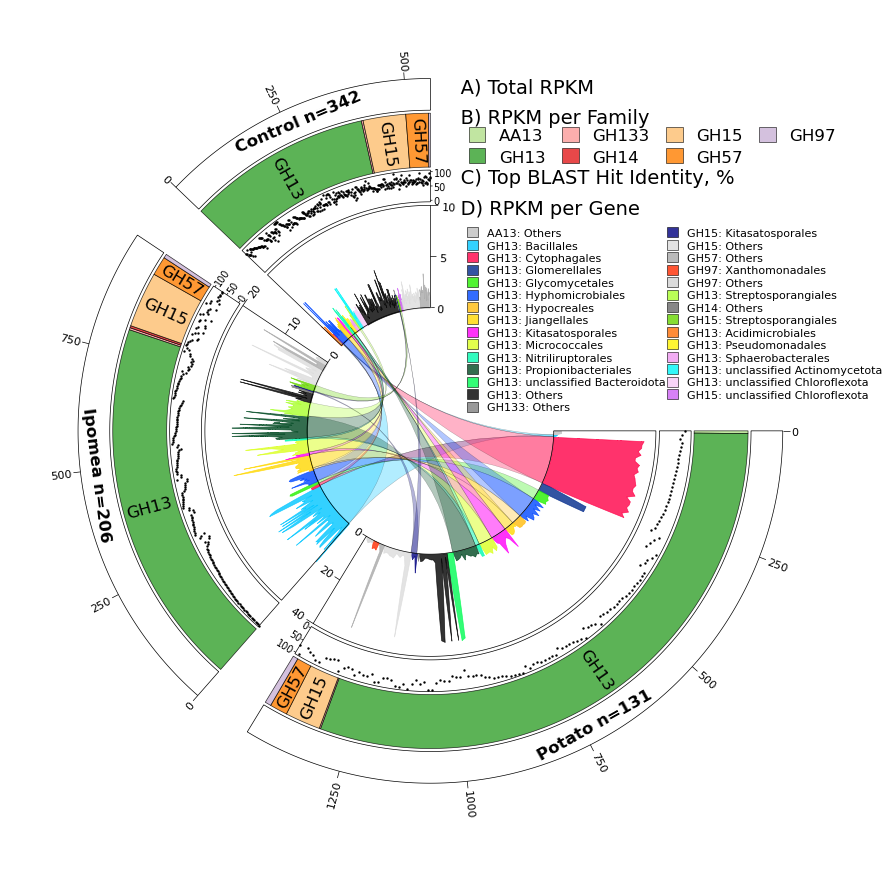

In [60]:
from pycirclize import Circos
from pycirclize.parser import StackedBarTable
from matplotlib.patches import Patch
from pycirclize.utils import ColorCycler
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import random
from collections import defaultdict

link_reg_dct = defaultdict(list)


np.random.seed(0)
ColorCycler.set_cmap("tab10")

GREYS_NAMES = ['dimgray', 
               'lightgrey', 
               'darkgray',
               'gainsboro',
               'gray', 
               'black',
               'silver',]
HATCH_STYLES = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']



NUM_COLORS = 25

cm = plt.get_cmap('gist_ncar')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
COLORS_30 = [colors.to_hex(scalarMap.to_rgba(i)) for i in range(NUM_COLORS)]

## Let's shuffle the colors so they are better displayed
# COLORS_30 = COLORS_30[::4] + COLORS_30[1::4] + COLORS_30[2::4] +COLORS_30[3::4]#+COLORS_30[4::5]
# for __ in range(4):
random.Random(1).shuffle(COLORS_30)
# old way:
#ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# new way:




#total RPKM of the amylases
sectors = {"Potato": 1444.2933, "Ipomea": 981.483, "Control": 550.5997}
sector_colors = {"Potato": "white", "Ipomea": "white", 
                 "Control": "white"}
circos = Circos(sectors, space=10, start=90, end=360, endspace=False)

#dictionary for gh labels
gh_name_to_color = {}
gh_name_to_color2 = {}
gh_order_to_color = {}
color_counter = 0

for sector in circos.sectors:
    print(sector.name, sector.start, sector.end, sector.size,)
    outer_track = sector.add_track((91, 100))
    outer_track.text(f"{sector.name} n={gh_counts[sector.name]}", color="black", size=12, fontweight='bold')
    outer_track.axis(fc="none")
    outer_track.xticks_by_interval(interval=250, label_orientation="vertical")
    # GH Track
    gh_track = sector.add_track((74, 91), r_pad_ratio=0.1)
    #rect_size = 100
    family_rpkms = gh_families_rpkm[sector.name]
    gh_end_pos = 0
    ColorCycler.set_cmap("Paired")
    for i, (gh_name, gh_rect_size) in enumerate(family_rpkms.items()):
        gh_name_to_color[gh_name] = None
        x1 = gh_end_pos
        x2 = gh_end_pos + gh_rect_size
        c = ColorCycler(i+2)
        gh_name_to_color[gh_name] = c #this works because the dictionary has zero values
        if gh_rect_size > 0:
            gh_track.rect(x1, x2, ec="black", lw=0.5, 
                          color=c, alpha=0.8)
            
            if gh_rect_size > 20:
                gh_track.text(gh_name, (x1 + x2) / 2 -2, 
                              size=12, color="Black", orientation="vertical")
        gh_end_pos = x2
        
    # Identity track
    id_track = sector.add_track((74, 65), r_pad_ratio=0.1)
    #rect_size = 100
    #family_counts = gh_families_cnt[sector.name]
    total_gene_cnt = sum(gh_families_cnt[sector.name].values())
    #rect_size = sectors[sector.name] / total_gene_cnt
    
    #adding extra positions to sync with fill_between
    x = np.linspace(sector.start, sector.end, num=total_gene_cnt)
    y = fixed_gene_data[fixed_gene_data.Metagenome == sector.name]["Pairwise Identity"].to_list()
    
    #y = np.random.randint(38, 100, len(x))
    
    #### scatter ####
    id_track.axis()
    id_track.scatter(x, y, color="black", s=3, marker='o')
    id_track.yticks([0, 50, 100], ['0', '50', '100'], label_margin=0.25, tick_length=0.5, label_size=7)
    
    
#     # Bar Track
#     family_rpkms = gh_families_rpkm[sector.name]
#     gh_end_pos = 0
#     for i, (gh_name, gh_rect_size) in enumerate(family_rpkms.items()):
#         gh_name_to_color[gh_name] = None
#         x1 = gh_end_pos
#         x2 = gh_end_pos + gh_rect_size
#         c = ColorCycler(i+11)
#         gh_name_to_color[gh_name] = c
#         if gh_rect_size > 0:
#             gh_track.rect(x1, x2, ec="black", lw=0.5, 
#                           color=c, alpha=0.8)
            
#             if gh_rect_size > 20:
#                 gh_track.text(gh_name, (x1 + x2) / 2 -2, 
#                               size=12, color="Black", orientation="vertical")
#         gh_end_pos = x2

    ######## Gene RPKM Track #######################
    #todo: testing with family counts, redo with taxonomies within family
    
    family_cnts = gh_families_cnt[sector.name]
    
    
    gene_track = sector.add_track((64, 35), )
    gene_track.axis()
#     _track.bar(x, y, color="orange")
    
    gene_start_pos = 0
    #adding an extra position for fill_between to work consistently
    x = np.linspace(sector.start, sector.end, num=total_gene_cnt+1)
    z = fixed_gene_data[fixed_gene_data.Metagenome == sector.name]["RPKM"].to_list()+[0]
    skipped_colors = 0
    for i, (key, lbl_cnt) in enumerate(ord_gh_group_cnt.items()):
        mg, gh_name, lbl, is_taxon_selected = key
        #print(i, mg, gh_name, lbl, lbl_cnt)
    #for i, (gh_name, gh_cnt) in enumerate(family_cnts.items()):
        #gh_name_to_color2[lbl] = None

        if mg != sector.name:
            continue
        
        
        gene_current_pos = gene_start_pos + lbl_cnt
        #print(sector.name, gh_name, x1, x2, family_cnts[gh_name])

        #ColorCycler.set_cmap("tab20")
        
        
        c = gh_name_to_color2.get(lbl)
        if not c:
            if is_taxon_selected:
                # skipping builtin greys
#                 if color_counter == 14: #only for tab20 cmap
#                     color_counter += 2
                c = COLORS_30.pop()
                #c = ColorCycler(color_counter)
                
                gh_name_to_color2[lbl] = c
                color_counter += 1
            else: # an others label
                c = GREYS_NAMES.pop()
                h = HATCH_STYLES.pop()
                gh_name_to_color2[lbl] = c
            
            
        #gh_name_to_color2[gh_name] = c
        
        ########## debug printing ###################
#         print(mg, lbl,gene_width, gene_start_pos, gene_current_pos, 
#               z[gene_start_pos: gene_current_pos], 
#               x[gene_start_pos: gene_current_pos])
        #print("gene width:",  (x[gene_current_pos] - x[gene_start_pos])/ lbl_cnt)
#         print("#### ",sector.name, sector.start, sector.end)
#         print(gh_name, family_cnts[gh_name], lbl, lbl_cnt, len(x[gene_start_pos: gene_current_pos]),
#               gene_start_pos, gene_current_pos)
#         print()


        y_max_tick = int(round(max(z), -1))
        #taking care of the edge values, barplot doesn't have it
        #adding a final fill value of zero at the next position
        if ord_gh_group_cnt[(mg,gh_name, lbl, is_taxon_selected)] > 0:
            if is_taxon_selected:
                gene_track.fill_between(x[gene_start_pos: gene_current_pos+1], 
                                        z[gene_start_pos: gene_current_pos]+[0],
                                        y2=0, fc=c, ec=c, lw=0.5, alpha=0.8, 
                                        vmin=0, vmax=y_max_tick)
            else:
                gene_track.fill_between(x[gene_start_pos: gene_current_pos+1], 
                                        z[gene_start_pos: gene_current_pos]+[0],
                                        y2=0, fc=c, ec=c, lw=0.5, alpha=0.8, 
                                        vmin=0, vmax=y_max_tick)#, hatch=h)
            
#             gene_track.bar(x[gene_start_pos: gene_current_pos], 
#                                     z[gene_start_pos: gene_current_pos],
#                                     fc=c, ec=c, lw=0.5, alpha=0.5, 
#                                     vmin=0, vmax=y_max_tick, width=1)
        
#         if family_cnts[gh_name] > 0:
#             gene_track.fill_between(x, z[:gene_start_pos] + y[gene_start_pos: gene_current_pos] + z[gene_current_pos:], 
#                                     y2=0, fc=c, ec="black", lw=0.5, alpha=0.5)
        
        ### populate link dictionary ###

        if is_taxon_selected:
            link_reg_dct[lbl].append((sector.name, x[gene_start_pos], x[gene_current_pos], c))

        
        gene_start_pos = gene_current_pos
    
    gene_track.yticks([0, int(y_max_tick/2), y_max_tick], 
                      ['0',str(int(y_max_tick/2)), str(y_max_tick)], 
                      label_margin=1,
                      tick_length=2,
                      side='right')
        


        #gene_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    

#     # Fill Track
#     fill_track = sector.add_track((50, 60), r_pad_ratio=0.1)
#     fill_track.axis()
#     fill_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    
    ### Gene RPKM track

    
#     for i in range(int(gh_track.size / rect_size)):
#         x1, x2 = i * rect_size, i * rect_size + rect_size
#         gh_track.rect(x1, x2, ec="black", lw=0.5, color=ColorCycler())
#         gh_track.text(str(i + 1), (x1 + x2) / 2, size=8, color="white")
#     # Plot sector name
#     sector.text(f"Sector: {sector.name}", r=110, size=15)
#     # Create x positions & randomized y values for data plotting
#     x = np.arange(sector.start, sector.end) + 0.5
#     y = np.random.randint(0, 100, len(x))
#     # Plot line
#     line_track = sector.add_track((75, 100), r_pad_ratio=0.1)
#     line_track.axis()
#     line_track.xticks_by_interval(1)
#     line_track.line(x, y)
#     # Plot points
#     points_track = sector.add_track((45, 70), r_pad_ratio=0.1)
#     points_track.axis()
#     points_track.scatter(x, y)
#     # Plot bar
#     bar_track = sector.add_track((15, 40), r_pad_ratio=0.1)
#     bar_track.axis()
#     bar_track.bar(x, y)

#circos.link(("B", 0, 3), ("C", 7, 11), color="skyblue")

### Plotting links
for lbl, links in link_reg_dct.items():
    if len(links) == 2:
        #sector_name, beg, end, clr = loc
        a, b = links
        circos.link((a[0], a[1], a[2]), (b[0], b[1], b[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
    elif len(links) == 3:
        a, b, c = links
        circos.link((a[0], a[1], a[2]), (b[0], b[1], b[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
        circos.link((a[0], a[1], a[2]), (c[0], c[1], c[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
        circos.link((b[0], b[1], b[2]), (c[0], c[1], c[2]), color=b[3], alpha=0.3, ec="black", lw=0.3)
    elif len(links) == 1:
        continue
    else:
        print("Mistake occured!!!! We shouldn't be here")




# Plot text description
text_common_kws = dict(ha="left", va="center", size=14)
circos.text(" "*5 + "A) " + "Total RPKM", r=97.5, color="black", **text_common_kws)
circos.text(" "*5 + "B) " + "RPKM per Family", r=89, color="black", **text_common_kws)
circos.text(" "*5 + "C) " + "Top BLAST Hit Identity, %", r=72, color="black", **text_common_kws)
circos.text(" "*5 + "D) " + "RPKM per Gene", r=63, color="black", **text_common_kws)




    
pyplot.tight_layout()


fig = circos.plotfig()
#fig.set_size_inches(12, 10)

# Plot legends

#gene legend
col_name2color2 = gh_name_to_color2
legend2 = pyplot.legend(
    handles=[Patch(label=n, fc=c, ec="black", lw=0.5, alpha=0.8) for n, c in col_name2color2.items()],
    bbox_to_anchor=(0.83, .65),
    fontsize=8,
    loc="center",
    ncols=2,
    labelspacing = 0.15, #vertical spacing between items
    columnspacing = .1,  # horizontal spacing
)
 
#
col_name2color = gh_name_to_color

    
_ = pyplot.legend(
    handles=[Patch(label=n, fc=c, ec="black", lw=0.5, alpha=0.8) for n, c in col_name2color.items()],
    bbox_to_anchor=(0.8, .885),
    fontsize=12,
    loc="center",
    ncols=4,
    labelspacing = 0.3, #vertical spacing between items
    columnspacing = 1,  # horizontal spacing
)



fig.gca().add_artist(legend2)
fig.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.1)
# #pyplot.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# pyplot.savefig("gh_families_cutof2.pdf", bbox_inches='tight')
# pyplot.savefig("gh_families_cutof2.tif", dpi=300, bbox_inches='tight')
# pyplot.savefig("gh_families_cutof2.png", dpi=600, bbox_inches='tight')
# pyplot.savefig("gh_families_cutof2.eps", bbox_inches='tight')

### Italics legend
* Contains logic to arrange taxa labels by their order in their respective samples
* The others groups placed after the selected samples in a family

Potato 0 1444.2933 1444.2933
Ipomea 0 981.483 981.483
Control 0 550.5997 550.5997


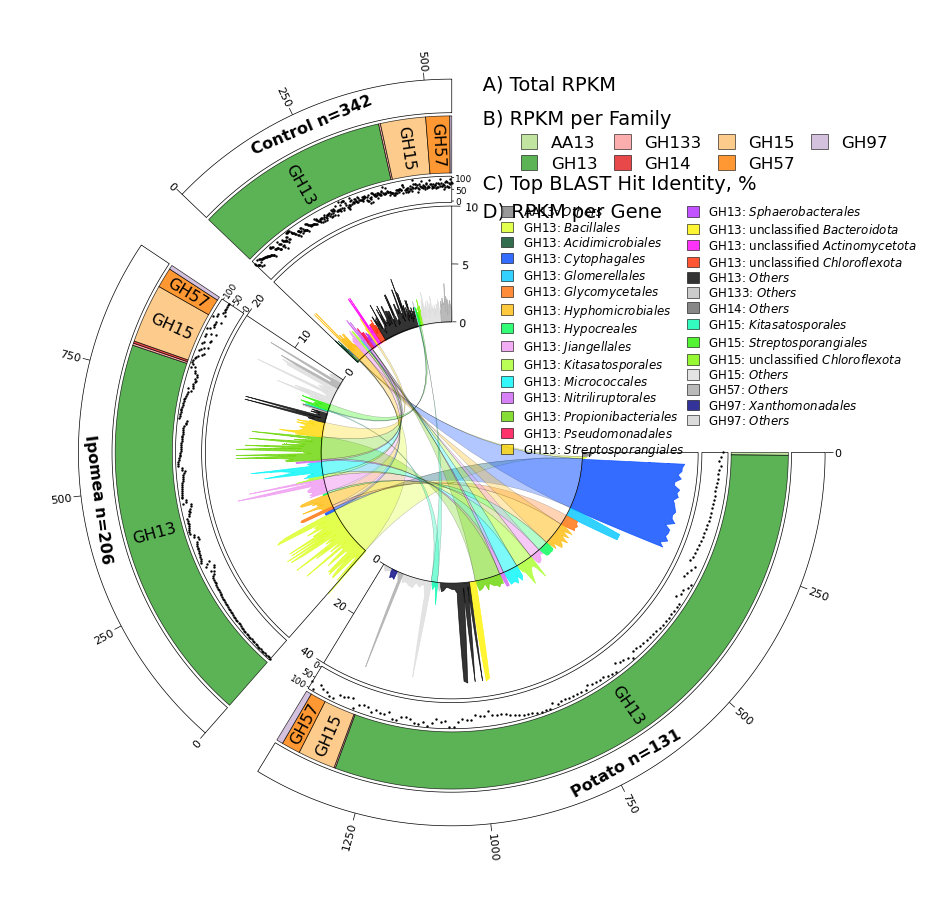

In [62]:
from pycirclize import Circos
from pycirclize.parser import StackedBarTable
from matplotlib.patches import Patch
from pycirclize.utils import ColorCycler
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import random
from collections import defaultdict
import matplotlib
link_reg_dct = defaultdict(list)


np.random.seed(0)
ColorCycler.set_cmap("tab10")

GREYS_NAMES = ['dimgray', 
               'lightgrey', 
               'darkgray',
               'gainsboro', 
               'silver',
               'black',
               'gray']
HATCH_STYLES = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']



NUM_COLORS = 25

cm = plt.get_cmap('gist_ncar')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
COLORS_30 = [colors.to_hex(scalarMap.to_rgba(i)) for i in range(NUM_COLORS)]

## Let's shuffle the colors so they are better displayed
COLORS_30 = COLORS_30[::4] + COLORS_30[1::4] + COLORS_30[2::4] +COLORS_30[3::4]#+COLORS_30[4::5]
for num_shfl in range(4):
    random.Random(num_shfl).shuffle(COLORS_30)
# old way:
#ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# new way:




#total RPKM of the amylases
sectors = {"Potato": 1444.2933, "Ipomea": 981.483, "Control": 550.5997}
sector_colors = {"Potato": "white", "Ipomea": "white", 
                 "Control": "white"}
circos = Circos(sectors, space=10, start=90, end=360, endspace=False)

#dictionary for gh labels
gh_name_to_color = {}
gh_name_to_color2 = {}
gh_order_to_color = {}
color_counter = 0

for sector in circos.sectors:
    print(sector.name, sector.start, sector.end, sector.size,)
    outer_track = sector.add_track((91, 100))
    outer_track.text(f"{sector.name} n={gh_counts[sector.name]}", color="black", size=11.5, fontweight='bold')
    outer_track.axis(fc="none")
    outer_track.xticks_by_interval(interval=250, label_orientation="vertical")
    # GH Track
    gh_track = sector.add_track((74, 91), r_pad_ratio=0.1)
    #rect_size = 100
    family_rpkms = gh_families_rpkm[sector.name]
    gh_end_pos = 0
    ColorCycler.set_cmap("Paired")
    for i, (gh_name, gh_rect_size) in enumerate(family_rpkms.items()):
        gh_name_to_color[gh_name] = None
        x1 = gh_end_pos
        x2 = gh_end_pos + gh_rect_size
        c = ColorCycler(i+2)
        gh_name_to_color[gh_name] = c #this works because the dictionary has zero values
        if gh_rect_size > 0:
            gh_track.rect(x1, x2, ec="black", lw=0.5, 
                          color=c, alpha=0.8)
            
            if gh_rect_size > 20:
                gh_track.text(gh_name, (x1 + x2) / 2 -2, 
                              size=11.5, color="Black", orientation="vertical")
        gh_end_pos = x2
        
    # Identity track
    id_track = sector.add_track((74, 67), r_pad_ratio=0.1)
    #rect_size = 100
    #family_counts = gh_families_cnt[sector.name]
    total_gene_cnt = sum(gh_families_cnt[sector.name].values())
    #rect_size = sectors[sector.name] / total_gene_cnt
    
    #adding extra positions to sync with fill_between
    x = np.linspace(sector.start, sector.end, num=total_gene_cnt)
    y = fixed_gene_data[fixed_gene_data.Metagenome == sector.name]["Pairwise Identity"].to_list()
    
    #y = np.random.randint(38, 100, len(x))
    
    #### scatter ####
    id_track.axis()
    id_track.scatter(x, y, color="black", s=3, marker='o')
    id_track.yticks([0, 50, 100], ['0', '50', '100'], label_margin=0.25, tick_length=0.5, label_size=6.5)
    
    
#     # Bar Track
#     family_rpkms = gh_families_rpkm[sector.name]
#     gh_end_pos = 0
#     for i, (gh_name, gh_rect_size) in enumerate(family_rpkms.items()):
#         gh_name_to_color[gh_name] = None
#         x1 = gh_end_pos
#         x2 = gh_end_pos + gh_rect_size
#         c = ColorCycler(i+11)
#         gh_name_to_color[gh_name] = c
#         if gh_rect_size > 0:
#             gh_track.rect(x1, x2, ec="black", lw=0.5, 
#                           color=c, alpha=0.8)
            
#             if gh_rect_size > 20:
#                 gh_track.text(gh_name, (x1 + x2) / 2 -2, 
#                               size=12, color="Black", orientation="vertical")
#         gh_end_pos = x2

    ######## Gene RPKM Track #######################
    #todo: testing with family counts, redo with taxonomies within family
    
    family_cnts = gh_families_cnt[sector.name]
    
    
    gene_track = sector.add_track((66, 35), )
    gene_track.axis()
#     _track.bar(x, y, color="orange")
    
    gene_start_pos = 0
    #adding an extra position for fill_between to work consistently
    x = np.linspace(sector.start, sector.end, num=total_gene_cnt+1)
    z = fixed_gene_data[fixed_gene_data.Metagenome == sector.name]["RPKM"].to_list()+[0]
    skipped_colors = 0
    for i, (key, lbl_cnt) in enumerate(ord_gh_group_cnt.items()):
        mg, gh_name, lbl, is_taxon_selected = key
        #print(i, mg, gh_name, lbl, lbl_cnt)
    #for i, (gh_name, gh_cnt) in enumerate(family_cnts.items()):
        #gh_name_to_color2[lbl] = None

        if mg != sector.name:
            continue
        
        
        gene_current_pos = gene_start_pos + lbl_cnt
        #print(sector.name, gh_name, x1, x2, family_cnts[gh_name])

        #ColorCycler.set_cmap("tab20")
        
        
        c = gh_name_to_color2.get(lbl)
        if not c:
            if is_taxon_selected:
                # skipping builtin greys
#                 if color_counter == 14: #only for tab20 cmap
#                     color_counter += 2
                c = COLORS_30.pop()
                #c = ColorCycler(color_counter)
                
                gh_name_to_color2[lbl] = c
                color_counter += 1
            else: # an others label
                c = GREYS_NAMES.pop()
                h = HATCH_STYLES.pop()
                gh_name_to_color2[lbl] = c
            
            
        #gh_name_to_color2[gh_name] = c
        
        ########## debug printing ###################
#         print(mg, lbl,gene_width, gene_start_pos, gene_current_pos, 
#               z[gene_start_pos: gene_current_pos], 
#               x[gene_start_pos: gene_current_pos])
        #print("gene width:",  (x[gene_current_pos] - x[gene_start_pos])/ lbl_cnt)
#         print("#### ",sector.name, sector.start, sector.end)
#         print(gh_name, family_cnts[gh_name], lbl, lbl_cnt, len(x[gene_start_pos: gene_current_pos]),
#               gene_start_pos, gene_current_pos)
#         print()


        y_max_tick = int(round(max(z), -1))
        #taking care of the edge values, barplot doesn't have it
        #adding a final fill value of zero at the next position
        if ord_gh_group_cnt[(mg,gh_name, lbl, is_taxon_selected)] > 0:
            if is_taxon_selected:
                gene_track.fill_between(x[gene_start_pos: gene_current_pos+1], 
                                        z[gene_start_pos: gene_current_pos]+[0],
                                        y2=0, fc=c, ec=c, lw=0.5, alpha=0.8, 
                                        vmin=0, vmax=y_max_tick)
            else:
                gene_track.fill_between(x[gene_start_pos: gene_current_pos+1], 
                                        z[gene_start_pos: gene_current_pos]+[0],
                                        y2=0, fc=c, ec=c, lw=0.5, alpha=0.8, 
                                        vmin=0, vmax=y_max_tick)#, hatch=h)
            
#             gene_track.bar(x[gene_start_pos: gene_current_pos], 
#                                     z[gene_start_pos: gene_current_pos],
#                                     fc=c, ec=c, lw=0.5, alpha=0.5, 
#                                     vmin=0, vmax=y_max_tick, width=1)
        
#         if family_cnts[gh_name] > 0:
#             gene_track.fill_between(x, z[:gene_start_pos] + y[gene_start_pos: gene_current_pos] + z[gene_current_pos:], 
#                                     y2=0, fc=c, ec="black", lw=0.5, alpha=0.5)
        
        ### populate link dictionary ###

        if is_taxon_selected:
            link_reg_dct[lbl].append((sector.name, x[gene_start_pos], x[gene_current_pos], c))

        
        gene_start_pos = gene_current_pos
    
    gene_track.yticks([0, int(y_max_tick/2), y_max_tick], 
                      ['0',str(int(y_max_tick/2)), str(y_max_tick)], 
                      label_margin=1,
                      tick_length=2,
                      side='right')
        


        #gene_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    

#     # Fill Track
#     fill_track = sector.add_track((50, 60), r_pad_ratio=0.1)
#     fill_track.axis()
#     fill_track.fill_between(x, y, y2=0, fc="red", ec="black", lw=0.5, alpha=0.5)
    
    ### Gene RPKM track

    
#     for i in range(int(gh_track.size / rect_size)):
#         x1, x2 = i * rect_size, i * rect_size + rect_size
#         gh_track.rect(x1, x2, ec="black", lw=0.5, color=ColorCycler())
#         gh_track.text(str(i + 1), (x1 + x2) / 2, size=8, color="white")
#     # Plot sector name
#     sector.text(f"Sector: {sector.name}", r=110, size=15)
#     # Create x positions & randomized y values for data plotting
#     x = np.arange(sector.start, sector.end) + 0.5
#     y = np.random.randint(0, 100, len(x))
#     # Plot line
#     line_track = sector.add_track((75, 100), r_pad_ratio=0.1)
#     line_track.axis()
#     line_track.xticks_by_interval(1)
#     line_track.line(x, y)
#     # Plot points
#     points_track = sector.add_track((45, 70), r_pad_ratio=0.1)
#     points_track.axis()
#     points_track.scatter(x, y)
#     # Plot bar
#     bar_track = sector.add_track((15, 40), r_pad_ratio=0.1)
#     bar_track.axis()
#     bar_track.bar(x, y)

#circos.link(("B", 0, 3), ("C", 7, 11), color="skyblue")

### Plotting links
for lbl, links in link_reg_dct.items():
    if len(links) == 2:
        #sector_name, beg, end, clr = loc
        a, b = links
        circos.link((a[0], a[1], a[2]), (b[0], b[1], b[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
    elif len(links) == 3:
        a, b, c = links
        circos.link((a[0], a[1], a[2]), (b[0], b[1], b[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
        circos.link((a[0], a[1], a[2]), (c[0], c[1], c[2]), color=a[3], alpha=0.3, ec="black", lw=0.3)
        circos.link((b[0], b[1], b[2]), (c[0], c[1], c[2]), color=b[3], alpha=0.3, ec="black", lw=0.3)
    elif len(links) == 1:
        continue
    else:
        print("Mistake occured!!!! We shouldn't be here")




# Plot text description
text_common_kws = dict(ha="left", va="center", size=14)
circos.text(" "*5 + "A) " + "Total RPKM", r=98.5, color="black", **text_common_kws)
circos.text(" "*5 + "B) " + "RPKM per Family", r=89.5, color="black", **text_common_kws)
circos.text(" "*5 + "C) " + "Top BLAST Hit Identity, %", r=72., color="black", **text_common_kws)
circos.text(" "*5 + "D) " + "RPKM per Gene", r=64.5, color="black", **text_common_kws)




    


fig = circos.plotfig()
fig.tight_layout()
# Plot legends

#gene legend
#gh_name_to_color2   
col_name2color2 = {}


### re-order labels by each metagenome: order potato, ipomea, control
#### and ensuring the Others labels are at the end

mg_gh_lbl = {}
_mgs = []
_ghs = []

for k, v in ord_gh_group_cnt.items():
    _m, _gh, _lbl, _is_sel = k
    if _m not in _mgs:
        _mgs.append(_m)
    
    if _gh not in _ghs:
        
        _ghs.append(_gh)
    if mg_gh_lbl.get(_m) is None:
        mg_gh_lbl[_m] = defaultdict(list)
    mg_gh_lbl[_m][_gh].append(_lbl)
    #mg_gh_lbl[_m][_gh].append(_lbl)
    #print(k, v)
    
lbl_ord = list()
by_mg = []
for _fam in sorted(_ghs):
    family_terminator = None
    #mg_gh_lbl.keys():
    for _mg in mg_gh_lbl.keys():
        l = mg_gh_lbl[_mg].get(_fam)
        if l:
            by_mg.append(l.pop(0))
    while any(by_mg):
        for _lbl in by_mg:
            if _lbl:
                if "Others" in _lbl:
                    family_terminator = _lbl
                    continue
                if _lbl not in lbl_ord:
                    lbl_ord.append(_lbl)
        
        by_mg = []
        for _mg in mg_gh_lbl.keys():
            l = mg_gh_lbl[_mg].get(_fam)
            if l:
                by_mg.append(l.pop(0))
    if family_terminator and (family_terminator not in lbl_ord):
        lbl_ord.append(family_terminator)


for n in lbl_ord:
    n_lst = n.split(" ") # 
    n_lst[-1] = "$\it{"+n_lst[-1]+"}$"
    new_name = " ".join(n_lst)
    col_name2color2[new_name] = gh_name_to_color2[n]
legend_properties = {'weight':'bold'}
legend2 = pyplot.legend(
    handles=[Patch(label=n, fc=c, ec="black", lw=0.5, alpha=0.8) for n, c in col_name2color2.items()],
    bbox_to_anchor=(0.828, .655),
    fontsize=8.5,
    loc="center",
    ncols=2,
#    prop=legend_properties,
    labelspacing = 0.1, #vertical spacing between items
    columnspacing = .25,  # horizontal spacing
)
 
#
col_name2color = gh_name_to_color

_ = pyplot.legend(
    handles=[Patch(label=n, fc=c, ec="black", lw=0.5, alpha=0.8) for n, c in col_name2color.items()],
    bbox_to_anchor=(0.822, .8825),
    fontsize=12,
    loc="center",
    ncols=4,
    labelspacing = 0.3, #vertical spacing between items
    columnspacing = 1,  # horizontal spacing
)



fig.gca().add_artist(legend2)
pyplot.subplots_adjust(left=0.01, right=0.99, top=0.99, bottom=0.01)
pyplot.savefig("gh_families_it_cutof2.pdf", bbox_inches='tight')
# pyplot.savefig("gh_families_it_cutof2.tif", dpi=300, bbox_inches='tight')
# pyplot.savefig("gh_families_it_cutof2.png", dpi=600, bbox_inches='tight')
# pyplot.savefig("gh_families_it_cutof2.eps", bbox_inches='tight')